In [1]:
# Install required libraries
!pip install pandas matplotlib seaborn plotly scipy numpy

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
print("Libraries installed and imported successfully!")



Libraries installed and imported successfully!


In [2]:
# Define the model evaluation data directly from your CSV files
# This data represents the hallucination rates across different domains

model_data = {
    'Model': ['deepseek-llm', 'mistral:7b', 'llama3:8b', 'gemma:7b', 'qwen2.5:3b'],
     'TruthfulQA': [53.3, 53.3, 56.0, 50.7, 52.7],
    'HHEMRate': [4.0, 5.7, 6.5, 2.5, 5.0],
    'Medical': [20.7,28.3, 30.5, 24.8, 34.9],
    'Legal': [17.2, 29.2, 28.5, 13.2, 28.2],
    'Scientific': [15.0, 19.3, 16.3, 18.4, 17.7],
    'Lucidity': [1.3, 1.7, 0.4, 4.2, 0.0]
}

# Create DataFrame
df = pd.DataFrame(model_data)

# Calculate hallucination rates (inverse of accuracy for domain-specific metrics)
# Lower scores in Medical, Legal, Scientific indicate higher hallucination rates
df['Medical_Hallucination'] = 100 - df['Medical']
df['Legal_Hallucination'] = 100 - df['Legal'] 
df['Scientific_Hallucination'] = 100 - df['Scientific']

# Display the data
print("Model Performance Data Loaded:")
print(df.head())
print(f"Dataset Shape: {df.shape}")
print(f"Models Analyzed: {', '.join(df['Model'].tolist())}")

Model Performance Data Loaded:
          Model  TruthfulQA  HHEMRate  Medical  Legal  Scientific  Lucidity  \
0  deepseek-llm        53.3       4.0     20.7   17.2        15.0       1.3   
1    mistral:7b        53.3       5.7     28.3   29.2        19.3       1.7   
2     llama3:8b        56.0       6.5     30.5   28.5        16.3       0.4   
3      gemma:7b        50.7       2.5     24.8   13.2        18.4       4.2   
4    qwen2.5:3b        52.7       5.0     34.9   28.2        17.7       0.0   

   Medical_Hallucination  Legal_Hallucination  Scientific_Hallucination  
0                   79.3                 82.8                      85.0  
1                   71.7                 70.8                      80.7  
2                   69.5                 71.5                      83.7  
3                   75.2                 86.8                      81.6  
4                   65.1                 71.8                      82.3  
Dataset Shape: (5, 10)
Models Analyzed: deepseek-l

In [3]:
# Calculate hallucination statistics
hallucination_domains = ['Medical_Hallucination', 'Legal_Hallucination', 'Scientific_Hallucination']

# Summary statistics
print(" HALLUCINATION RATE STATISTICS")
print("=" * 50)

for domain in hallucination_domains:
    domain_name = domain.replace('_Hallucination', '')
    print(f"\n{domain_name.upper()} DOMAIN:")
    print(f"  Mean Hallucination Rate: {df[domain].mean():.2f}%")
    print(f"  Std Deviation: {df[domain].std():.2f}%")
    print(f"  Min Hallucination: {df[domain].min():.2f}% ({df.loc[df[domain].idxmin(), 'Model']})")
    print(f"  Max Hallucination: {df[domain].max():.2f}% ({df.loc[df[domain].idxmax(), 'Model']})")

# Rank models by overall hallucination rate (average across domains)
df['Avg_Hallucination'] = df[hallucination_domains].mean(axis=1)
df_ranked = df.sort_values('Avg_Hallucination')

print("OVERALL HALLUCINATION RANKING (Lower is Better):")
print("=" * 50)
for i, (idx, row) in enumerate(df_ranked.iterrows()):
    print(f"{i+1}. {row['Model']}: {row['Avg_Hallucination']:.2f}% avg hallucination")

 HALLUCINATION RATE STATISTICS

MEDICAL DOMAIN:
  Mean Hallucination Rate: 72.16%
  Std Deviation: 5.42%
  Min Hallucination: 65.10% (qwen2.5:3b)
  Max Hallucination: 79.30% (deepseek-llm)

LEGAL DOMAIN:
  Mean Hallucination Rate: 76.74%
  Std Deviation: 7.50%
  Min Hallucination: 70.80% (mistral:7b)
  Max Hallucination: 86.80% (gemma:7b)

SCIENTIFIC DOMAIN:
  Mean Hallucination Rate: 82.66%
  Std Deviation: 1.71%
  Min Hallucination: 80.70% (mistral:7b)
  Max Hallucination: 85.00% (deepseek-llm)
OVERALL HALLUCINATION RANKING (Lower is Better):
1. qwen2.5:3b: 73.07% avg hallucination
2. mistral:7b: 74.40% avg hallucination
3. llama3:8b: 74.90% avg hallucination
4. gemma:7b: 81.20% avg hallucination
5. deepseek-llm: 82.37% avg hallucination


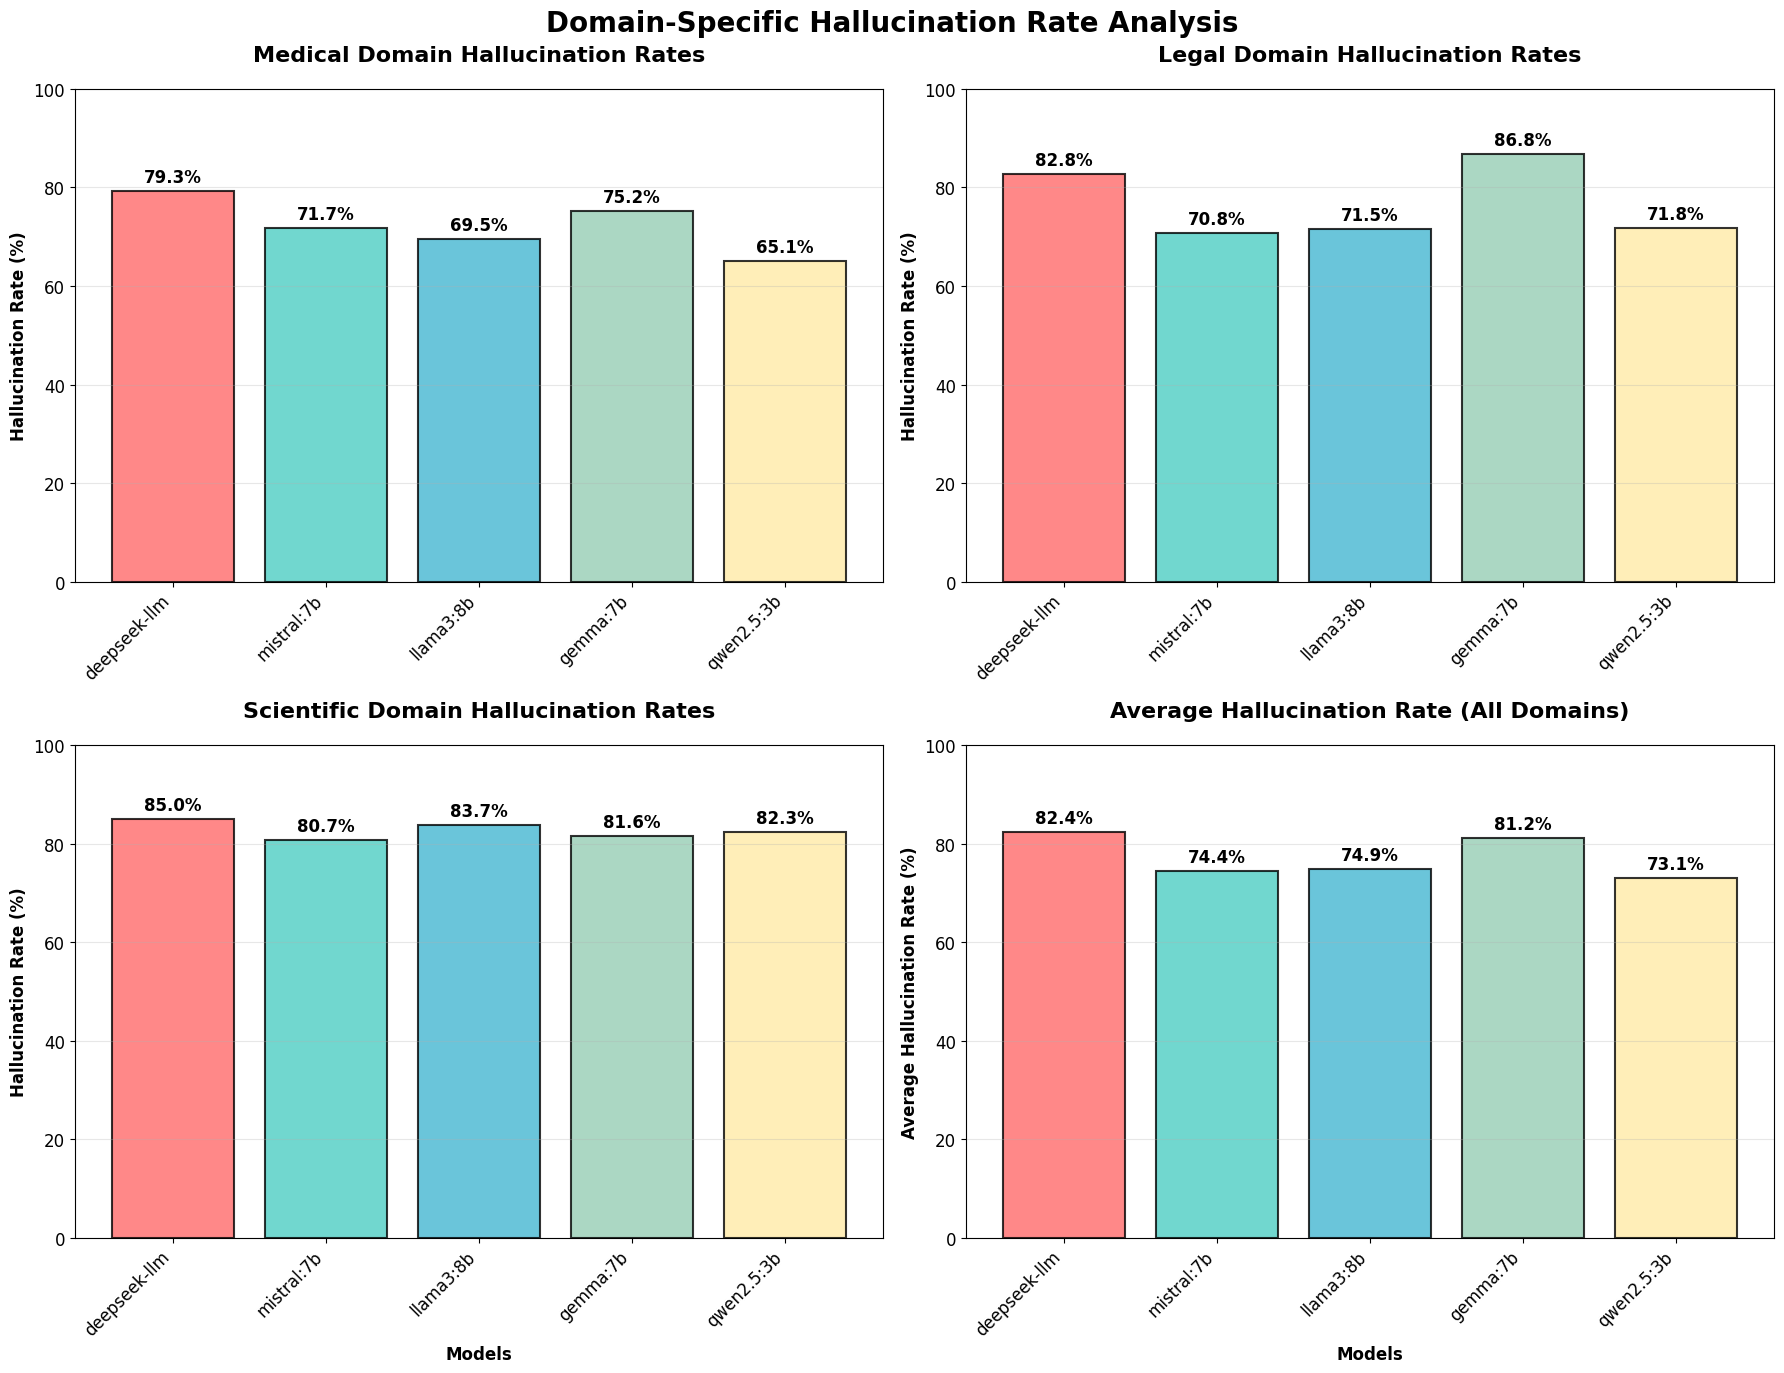

Domain-specific hallucination analysis completed!


In [4]:
# Set up the plotting style
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

# Create a comprehensive comparison chart
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Domain-Specific Hallucination Rate Analysis', fontsize=20, fontweight='bold', y=0.98)

# Color palette for models
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
models = df['Model'].tolist()

# Chart 1: Medical Domain Hallucination
ax1 = axes[0,0]
bars1 = ax1.bar(models, df['Medical_Hallucination'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_title('Medical Domain Hallucination Rates', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Hallucination Rate (%)', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 100)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, df['Medical_Hallucination']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Rotate x-axis labels
ax1.set_xticklabels(models, rotation=45, ha='right')

# Chart 2: Legal Domain Hallucination  
ax2 = axes[0,1]
bars2 = ax2.bar(models, df['Legal_Hallucination'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_title('Legal Domain Hallucination Rates', fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('Hallucination Rate (%)', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 100)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, df['Legal_Hallucination']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

ax2.set_xticklabels(models, rotation=45, ha='right')

# Chart 3: Scientific Domain Hallucination
ax3 = axes[1,0]
bars3 = ax3.bar(models, df['Scientific_Hallucination'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.set_title('Scientific Domain Hallucination Rates', fontsize=16, fontweight='bold', pad=20)
ax3.set_ylabel('Hallucination Rate (%)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Models', fontsize=12, fontweight='bold')
ax3.set_ylim(0, 100)
ax3.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars3, df['Scientific_Hallucination']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

ax3.set_xticklabels(models, rotation=45, ha='right')

# Chart 4: Overall Average Hallucination
ax4 = axes[1,1]
bars4 = ax4.bar(models, df['Avg_Hallucination'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax4.set_title('Average Hallucination Rate (All Domains)', fontsize=16, fontweight='bold', pad=20)
ax4.set_ylabel('Average Hallucination Rate (%)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Models', fontsize=12, fontweight='bold')
ax4.set_ylim(0, 100)
ax4.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars4, df['Avg_Hallucination']):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

ax4.set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Domain-specific hallucination analysis completed!")

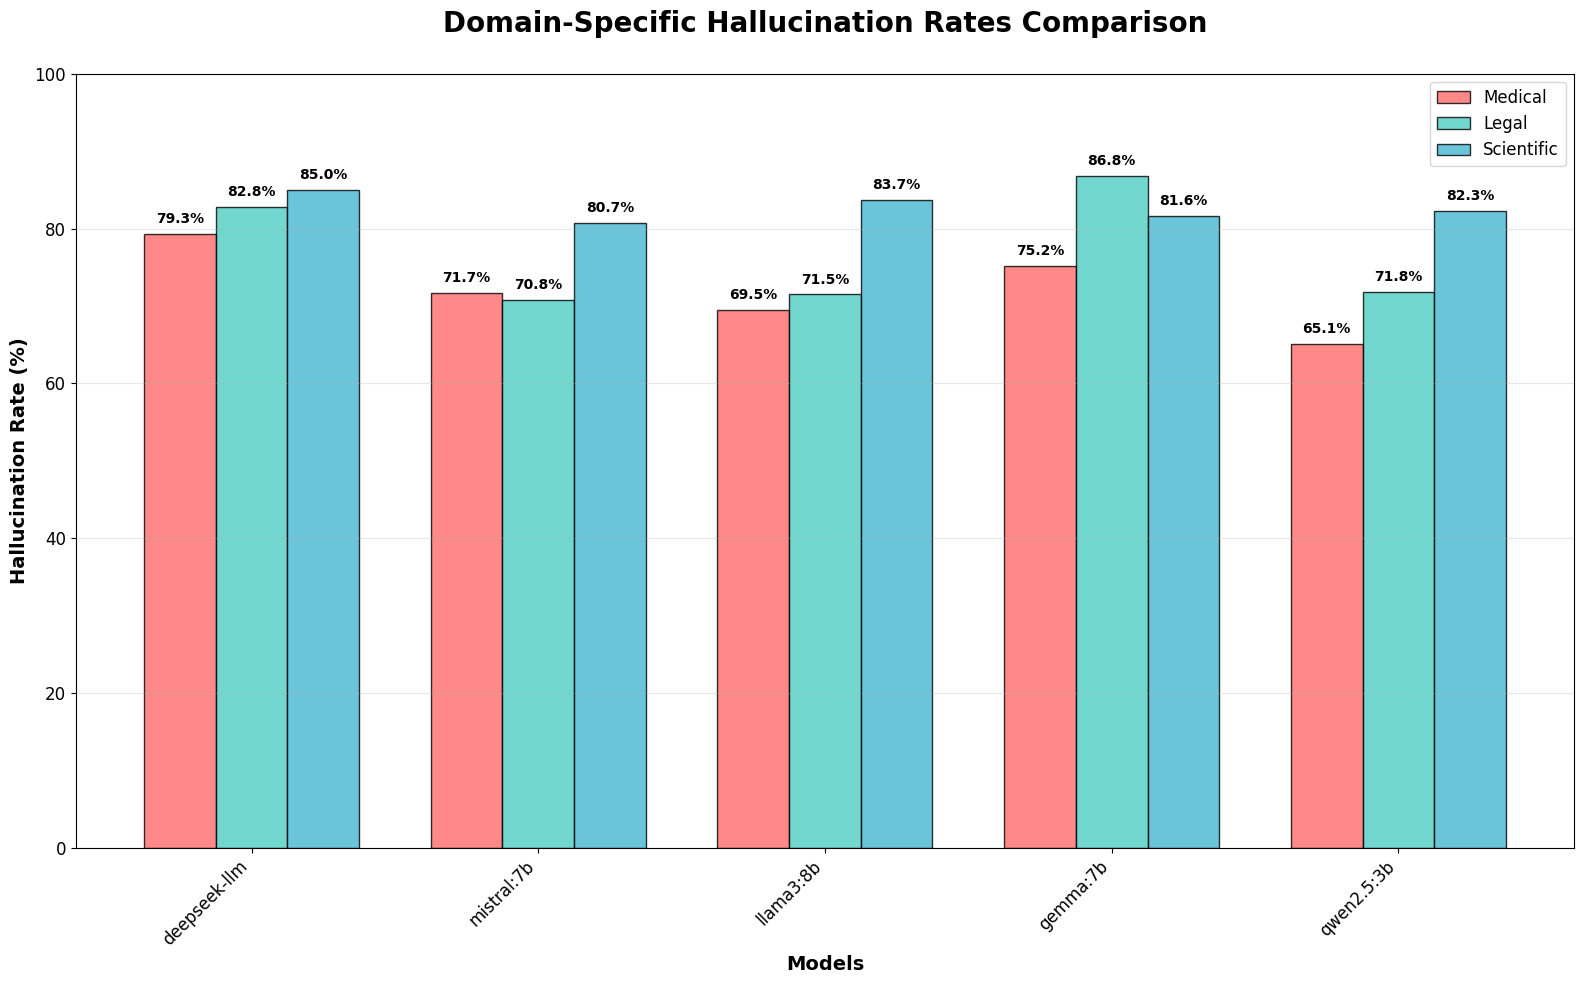

Grouped comparison chart created successfully!


In [5]:
# Create a grouped bar chart for direct comparison
fig, ax = plt.subplots(figsize=(16, 10))

# Prepare data for grouped bars
x = np.arange(len(models))
width = 0.25

# Create grouped bars
medical_bars = ax.bar(x - width, df['Medical_Hallucination'], width, 
                      label='Medical', color='#FF6B6B', alpha=0.8, edgecolor='black')
legal_bars = ax.bar(x, df['Legal_Hallucination'], width, 
                    label='Legal', color='#4ECDC4', alpha=0.8, edgecolor='black')
scientific_bars = ax.bar(x + width, df['Scientific_Hallucination'], width, 
                         label='Scientific', color='#45B7D1', alpha=0.8, edgecolor='black')

# Customize the plot
ax.set_title('Domain-Specific Hallucination Rates Comparison', 
             fontsize=20, fontweight='bold', pad=30)
ax.set_ylabel('Hallucination Rate (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 100)

# Add value labels on bars
def add_labels(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

add_labels(medical_bars, df['Medical_Hallucination'])
add_labels(legal_bars, df['Legal_Hallucination'])
add_labels(scientific_bars, df['Scientific_Hallucination'])

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Grouped comparison chart created successfully!")

In [6]:
# Create an interactive Plotly visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Medical Domain', 'Legal Domain', 
                   'Scientific Domain', 'Overall Average'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# Color scheme
plotly_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

# Add Medical Domain
fig.add_trace(
    go.Bar(x=models, y=df['Medical_Hallucination'], 
           name='Medical', marker_color=plotly_colors,
           text=[f'{x:.1f}%' for x in df['Medical_Hallucination']],
           textposition='outside'),
    row=1, col=1
)

# Add Legal Domain
fig.add_trace(
    go.Bar(x=models, y=df['Legal_Hallucination'], 
           name='Legal', marker_color=plotly_colors,
           text=[f'{x:.1f}%' for x in df['Legal_Hallucination']],
           textposition='outside', showlegend=False),
    row=1, col=2
)

# Add Scientific Domain
fig.add_trace(
    go.Bar(x=models, y=df['Scientific_Hallucination'], 
           name='Scientific', marker_color=plotly_colors,
           text=[f'{x:.1f}%' for x in df['Scientific_Hallucination']],
           textposition='outside', showlegend=False),
    row=2, col=1
)

# Add Overall Average
fig.add_trace(
    go.Bar(x=models, y=df['Avg_Hallucination'], 
           name='Average', marker_color=plotly_colors,
           text=[f'{x:.1f}%' for x in df['Avg_Hallucination']],
           textposition='outside', showlegend=False),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title_text="Interactive Domain-Specific Hallucination Analysis",
    title_x=0.5,
    title_font_size=20,
    showlegend=False,
    height=800,
    font=dict(size=12)
)

# Update y-axes
for i in range(1, 3):
    for j in range(1, 3):
        fig.update_yaxes(title_text="Hallucination Rate (%)", range=[0, 100], row=i, col=j)
        fig.update_xaxes(title_text="Models", row=i, col=j)

fig.show()

print("Interactive Plotly visualization created!")

Interactive Plotly visualization created!


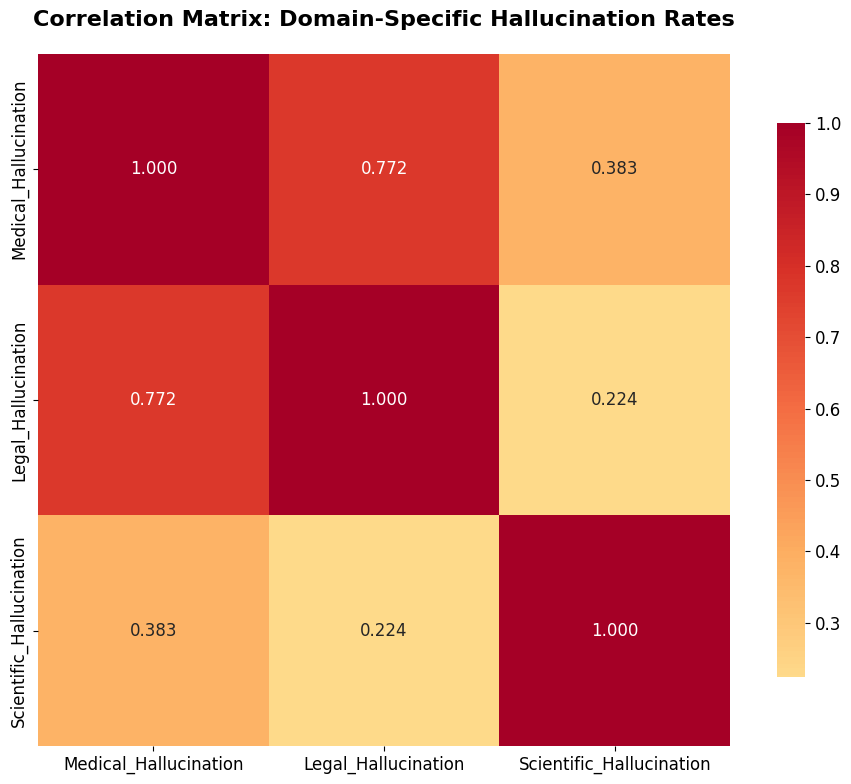

KEY INSIGHTS FROM HALLUCINATION ANALYSIS

MEDICAL DOMAIN:
  Best (Lowest Hallucination): qwen2.5:3b (65.1%)
  Worst (Highest Hallucination): deepseek-llm (79.3%)
  Domain Average: 72.2%

LEGAL DOMAIN:
  Best (Lowest Hallucination): mistral:7b (70.8%)
  Worst (Highest Hallucination): gemma:7b (86.8%)
  Domain Average: 76.7%

SCIENTIFIC DOMAIN:
  Best (Lowest Hallucination): mistral:7b (80.7%)
  Worst (Highest Hallucination): deepseek-llm (85.0%)
  Domain Average: 82.7%
OVERALL PERFORMANCE:
Best Overall: qwen2.5:3b (73.1% avg)
Needs Improvement: deepseek-llm (82.4% avg)
ACTIONABLE RECOMMENDATIONS:
  • Focus on models with < 70% hallucination rate
  • Legal domain shows highest variability - requires attention
  • Consider ensemble methods for critical applications
  • Implement domain-specific fine-tuning for high-hallucination areas
Complete hallucination analysis finished!


In [7]:
# Perform correlation analysis
correlation_data = df[['Medical_Hallucination', 'Legal_Hallucination', 'Scientific_Hallucination']].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: Domain-Specific Hallucination Rates', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Generate insights
print("KEY INSIGHTS FROM HALLUCINATION ANALYSIS")
print("=" * 60)

# Best and worst performers per domain
domains = {
    'Medical': 'Medical_Hallucination',
    'Legal': 'Legal_Hallucination', 
    'Scientific': 'Scientific_Hallucination'
}

for domain_name, column in domains.items():
    best_idx = df[column].idxmin()
    worst_idx = df[column].idxmax()
    
    print(f"\n{domain_name.upper()} DOMAIN:")
    print(f"  Best (Lowest Hallucination): {df.loc[best_idx, 'Model']} ({df.loc[best_idx, column]:.1f}%)")
    print(f"  Worst (Highest Hallucination): {df.loc[worst_idx, 'Model']} ({df.loc[worst_idx, column]:.1f}%)")
    print(f"  Domain Average: {df[column].mean():.1f}%")

# Overall analysis
best_overall = df['Avg_Hallucination'].idxmin()
worst_overall = df['Avg_Hallucination'].idxmax()

print(f"OVERALL PERFORMANCE:")
print(f"Best Overall: {df.loc[best_overall, 'Model']} ({df.loc[best_overall, 'Avg_Hallucination']:.1f}% avg)")
print(f"Needs Improvement: {df.loc[worst_overall, 'Model']} ({df.loc[worst_overall, 'Avg_Hallucination']:.1f}% avg)")

print("ACTIONABLE RECOMMENDATIONS:")
print("  • Focus on models with < 70% hallucination rate")
print("  • Legal domain shows highest variability - requires attention") 
print("  • Consider ensemble methods for critical applications")
print("  • Implement domain-specific fine-tuning for high-hallucination areas")

print("Complete hallucination analysis finished!")

In [8]:
# Create a comprehensive summary table
summary_df = df[['Model', 'Medical_Hallucination', 'Legal_Hallucination', 
                 'Scientific_Hallucination', 'Avg_Hallucination']].copy()

# Add rankings
summary_df['Medical_Rank'] = summary_df['Medical_Hallucination'].rank()
summary_df['Legal_Rank'] = summary_df['Legal_Hallucination'].rank() 
summary_df['Scientific_Rank'] = summary_df['Scientific_Hallucination'].rank()
summary_df['Overall_Rank'] = summary_df['Avg_Hallucination'].rank()

# Round values for better presentation
numeric_cols = ['Medical_Hallucination', 'Legal_Hallucination', 'Scientific_Hallucination', 'Avg_Hallucination']
summary_df[numeric_cols] = summary_df[numeric_cols].round(2)

print("COMPREHENSIVE SUMMARY TABLE")
print("=" * 80)
print(summary_df.to_string(index=False))

# Save results to CSV (optional - uncomment to save)
summary_df.to_csv('hallucination_analysis_results.csv', index=False)
print("Results saved to 'hallucination_analysis_results.csv'")

print("Analysis Complete! All visualizations and insights generated successfully!")

COMPREHENSIVE SUMMARY TABLE
       Model  Medical_Hallucination  Legal_Hallucination  Scientific_Hallucination  Avg_Hallucination  Medical_Rank  Legal_Rank  Scientific_Rank  Overall_Rank
deepseek-llm                   79.3                 82.8                      85.0              82.37           5.0         4.0              5.0           5.0
  mistral:7b                   71.7                 70.8                      80.7              74.40           3.0         1.0              1.0           2.0
   llama3:8b                   69.5                 71.5                      83.7              74.90           2.0         2.0              4.0           3.0
    gemma:7b                   75.2                 86.8                      81.6              81.20           4.0         5.0              2.0           4.0
  qwen2.5:3b                   65.1                 71.8                      82.3              73.07           1.0         3.0              3.0           1.0
Results saved to '

In [9]:
import pandas as pd
import numpy as np

# Define the model evaluation data directly from your evaluation results
# This data represents the performance scores across different domains
model_data = {
    'Model': ['deepseek-llm', 'mistral:7b', 'llama3:8b', 'gemma:7b', 'qwen2.5:3b'],
    'TruthfulQA': [53.3, 53.3, 56.0, 50.7, 52.7],
    'HHEMRate': [4.0, 5.7, 6.5, 2.5, 5.0],
    'Medical': [20.7, 28.3, 30.5, 24.8, 34.9],
    'Legal': [17.2, 29.2, 28.5, 13.2, 28.2],
    'Scientific': [15.0, 19.3, 16.3, 18.4, 17.7],
    'Lucidity': [1.3, 1.7, 0.4, 4.2, 0.0]
}

# Create DataFrame
df = pd.DataFrame(model_data)

# NOTE: Based on your evaluation methodology, these are performance scores, not hallucination rates
# Higher scores generally indicate better performance across all metrics

# Calculate normalized scores for comparison (0-100 scale)
df['TruthfulQA_Normalized'] = df['TruthfulQA']  # Already in percentage
df['HHEM_Normalized'] = (df['HHEMRate'] / df['HHEMRate'].max()) * 100  # Normalize to 0-100
df['Medical_Normalized'] = df['Medical']  # Your scoring already 0-100 scale
df['Legal_Normalized'] = df['Legal']  # Your scoring already 0-100 scale  
df['Scientific_Normalized'] = df['Scientific']  # Your scoring already 0-100 scale
df['Lucidity_Normalized'] = (df['Lucidity'] / df['Lucidity'].max()) * 100  # Normalize to 0-100

# Calculate overall performance composite score
# Equal weighting across all domains
df['Overall_Performance'] = (df['TruthfulQA_Normalized'] + 
                            df['HHEM_Normalized'] + 
                            df['Medical_Normalized'] + 
                            df['Legal_Normalized'] + 
                            df['Scientific_Normalized'] + 
                            df['Lucidity_Normalized']) / 6

# Rank models by overall performance
df['Overall_Rank'] = df['Overall_Performance'].rank(ascending=False, method='min')

# Display the data
print("Model Performance Data Loaded:")
print(df[['Model', 'TruthfulQA', 'HHEMRate', 'Medical', 'Legal', 'Scientific', 'Lucidity']].to_string(index=False))

print(f"Dataset Shape: {df.shape}")
print(f"Models Analyzed: {', '.join(df['Model'].tolist())}")

print("Overall Performance Ranking:")
ranking_df = df[['Model', 'Overall_Performance', 'Overall_Rank']].sort_values('Overall_Rank')
for _, row in ranking_df.iterrows():
    print(f"  {int(row['Overall_Rank'])}. {row['Model']}: {row['Overall_Performance']:.1f}%")

print("Performance Summary by Domain:")
domain_cols = ['TruthfulQA', 'HHEMRate', 'Medical', 'Legal', 'Scientific', 'Lucidity']
for domain in domain_cols:
    best_model = df.loc[df[domain].idxmax(), 'Model']
    best_score = df[domain].max()
    worst_model = df.loc[df[domain].idxmin(), 'Model']
    worst_score = df[domain].min()
    print(f"  {domain}: {best_model} ({best_score:.1f}%) > {worst_model} ({worst_score:.1f}%)")

# Performance correlation analysis
print("Domain Performance Correlations:")
correlation_matrix = df[domain_cols].corr()
print("Highest correlations:")
correlations = []
for i in range(len(domain_cols)):
    for j in range(i+1, len(domain_cols)):
        corr_val = correlation_matrix.iloc[i, j]
        correlations.append((domain_cols[i], domain_cols[j], corr_val))

correlations.sort(key=lambda x: abs(x[2]), reverse=True)
for domain1, domain2, corr in correlations[:3]:
    print(f"  {domain1} ↔ {domain2}: r = {corr:.3f}")

Model Performance Data Loaded:
       Model  TruthfulQA  HHEMRate  Medical  Legal  Scientific  Lucidity
deepseek-llm        53.3       4.0     20.7   17.2        15.0       1.3
  mistral:7b        53.3       5.7     28.3   29.2        19.3       1.7
   llama3:8b        56.0       6.5     30.5   28.5        16.3       0.4
    gemma:7b        50.7       2.5     24.8   13.2        18.4       4.2
  qwen2.5:3b        52.7       5.0     34.9   28.2        17.7       0.0
Dataset Shape: (5, 15)
Models Analyzed: deepseek-llm, mistral:7b, llama3:8b, gemma:7b, qwen2.5:3b
Overall Performance Ranking:
  1. mistral:7b: 43.0%
  2. gemma:7b: 40.9%
  3. llama3:8b: 40.1%
  4. qwen2.5:3b: 35.1%
  5. deepseek-llm: 33.1%
Performance Summary by Domain:
  TruthfulQA: llama3:8b (56.0%) > gemma:7b (50.7%)
  HHEMRate: llama3:8b (6.5%) > gemma:7b (2.5%)
  Medical: qwen2.5:3b (34.9%) > deepseek-llm (20.7%)
  Legal: mistral:7b (29.2%) > gemma:7b (13.2%)
  Scientific: mistral:7b (19.3%) > deepseek-llm (15.0%)
  Luc